# Exploring the Data - Key Correlation Analysis & Economic Data Review 

### Research Summary Table 1 - Economic Indicator Pairs and ETF Impact

| Economic Pair | Correlation | Impact on Global Index ETFs |
| :-- | :-- | :-- |
| 1. Inflation vs Interest Rates | Positive | Negative |
| 2. Inflation Rate vs Bond Yield (10 Yrs) | Positive | Negative |
| 3. FDI Inflow vs GDP Proxy | Positive | Positive |
| 4. Inflation Rate vs Export-to-Import Growth rate | Negative | Negative |
| 5. Interest Rate vs Export-to-Import Growth rate | Negative | Negative |
| 6. Bond Yield (10 Yrs) vs Export-to-Import Growth rate | Negative | Negative |

### AI-generated notes (first 3 points) on the above

1. Positive correlation: Both variables tend to move together (rise/fall simultaneously); for instance, higher inflation typically leads to higher interest rates, which often weighs on equity ETF performance.
2. Negative correlation: Variables move in opposite directions; for example, rising inflation may depress export growth, thus negatively impacting global index ETFs.
3. "Impact on Global Index ETFs" reflects typical market reactions: positive means the ETF is likely to benefit; negative means ETF returns may be pressured.
### My research notes on the matter:
- When interest and inflation rates rise – bond prices fall, so Global ETFs prices also fall
 Global Index ETF prices rise is linked to strong GDP growth, increase in foreign investments and healthy trade balances (i.e. export being bigger than your imports).
- The level of ETF price changes is also determined by what the ETF is created out of (e.g. bonds and stocks) as well as other considerations like geographic focus (e.g. country group that issued the bonds and/or stock) and sector exposure (e.g. stocks in technology or agricultural products).
- Strongly positive correlation tends to negatively impact the price of stock-based and bond-based Global Index ETFs but may positively impact commodity-based ETFs.
- Unlike you would anticipate, strongly negative correlation may not cancel each other out regarding how they impact Global Index ETF pricing but may increase the Global Index ETF pricing to other economic factors e.g. global market risk – so the investor should anticipate more price volatility (increase of price fluctuations) and asymmetry (i.e. less price distribution around the mean value but instead to either side of the graph)   


### Importing the relevant Python libraries

In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd, plotly.express as px, seaborn as sns, warnings

### Python Warnings - Switched Off

In [2]:
warnings.filterwarnings('ignore') 

### Loading the cleaned and feature-enriched dataset, multi-indexing and applying best practices

In [3]:
df = pd.read_csv("global_finance_data_FeatureEng.csv")

df1=df.copy() #Best Practice
df1 = df1.set_index(['Country',
                     'Stock_Index',
                     'Currency_Code'
                    ]) #multi-indexing
df1 = df1.astype({col: 'category' for col in df1.select_dtypes(include='object').columns}) #Best Practice

df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39 entries, ('United States', 'S&P_500', 'USD') to ('Israel', 'TA_125', 'ILS')
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Index_Value                          39 non-null     float64 
 1   Daily_Change_Percent                 39 non-null     float64 
 2   Market_Cap_Trillion_USD              39 non-null     float64 
 3   GDP_Growth_Rate_Percent              39 non-null     float64 
 4   Inflation_Rate_Percent               39 non-null     float64 
 5   Interest_Rate_Percent                39 non-null     float64 
 6   Unemployment_Rate_Percent            39 non-null     float64 
 7   Exchange_Rate_USD                    39 non-null     float64 
 8   Currency_Change_YTD_Percent          39 non-null     float64 
 9   Government_Debt_GDP_Percent          39 non-null     float64 
 10  Current_Account_Balance_Billi

### Applying the correlation method to the Pandas dataframe (using Pearson as chosen method)

In [4]:
#creating a new dataframe for purposes of correlation
corr_df = df1.select_dtypes(include='number').corr(method = "pearson") #excluding all non-number features/categories

In [5]:
corr_df.head()

Index_Value  Daily_Change_Percent  \
Index_Value                 1.000000              0.592975   
Daily_Change_Percent        0.592975              1.000000   
Market_Cap_Trillion_USD    -0.065593             -0.169280   
GDP_Growth_Rate_Percent    -0.342591             -0.151396   
Inflation_Rate_Percent      0.943576              0.683565   

                         Market_Cap_Trillion_USD  GDP_Growth_Rate_Percent  \
Index_Value                            -0.065593                -0.342591   
Daily_Change_Percent                   -0.169280                -0.151396   
Market_Cap_Trillion_USD                 1.000000                 0.082488   
GDP_Growth_Rate_Percent                 0.082488                 1.000000   
Inflation_Rate_Percent                 -0.085471                -0.312325   

                         Inflation_Rate_Percent  Interest_Rate_Percent  \
Index_Value                            0.943576               0.921451   
Daily_Change_Percent                   0.683565               0.700348   
Market_Cap_Trillion_USD               -0.085471              -0.094092   
GDP_Growth_Rate_Percent               -0.312325              -0.327330   
Inflation_Rate_Percent                 1.000000               0.993227   

                         Unemployment_Rate_Percent  Exchange_Rate_USD  \
Index_Value                               0.041014          -0.026851   
Daily_Change_Percent                      0.235952           0.108037   
Market_Cap_Trillion_USD                  -0.131534          -0.083918   
GDP_Growth_Rate_Percent                  -0.057782           0.405509   
Inflation_Rate_Percent                    0.075566          -0.020963   

                         Currency_Change_YTD_Percent  \
Index_Value                                -0.698433   
Daily_Change_Percent                       -0.770515   
Market_Cap_Trillion_USD                     0.142263   
GDP_Growth_Rate_Percent                     0.214582   
Inflation_Rate_Percent                     -0.805505   

                         Government_Debt_GDP_Percent  ...  Real_Estate_Index  \
Index_Value                                 0.056418  ...          -0.469120   
Daily_Change_Percent                        0.099419  ...          -0.457221   
Market_Cap_Trillion_USD                     0.292912  ...           0.337533   
GDP_Growth_Rate_Percent                    -0.119975  ...           0.246209   
Inflation_Rate_Percent                      0.000003  ...          -0.566867   

                         Export_Growth_Percent  Import_Growth_Percent  \
Index_Value                          -0.483727               0.217882   
Daily_Change_Percent                 -0.069834               0.493761   
Market_Cap_Trillion_USD              -0.107665              -0.177457   
GDP_Growth_Rate_Percent               0.463519               0.158388   
Inflation_Rate_Percent               -0.456972               0.300367   

                         Banking_Sector_Health_Num_Derived  \
Index_Value                                       0.319202   
Daily_Change_Percent                              0.487208   
Market_Cap_Trillion_USD                          -0.230660   
GDP_Growth_Rate_Percent                          -0.058278   
Inflation_Rate_Percent                            0.411287   

                         GDP_Proxy_Billion_USD  Current_Account_To_GDP_Ratio  \
Index_Value                          -0.065593                     -0.371845   
Daily_Change_Percent                 -0.169280                     -0.167934   
Market_Cap_Trillion_USD               1.000000                     -0.023403   
GDP_Growth_Rate_Percent               0.082488                      0.126182   
Inflation_Rate_Percent               -0.085471                     -0.437909   

                         Export_To_Import_Growth_Ratio  FDI_To_GDP_Ratio  \
Index_Value                                  -0.804409          0.150327   
Daily_Change_Percent                      

### First Sample Seaborn Heatmap - shows too much data! See if we can do better by 'cherry-picking' higher corrs

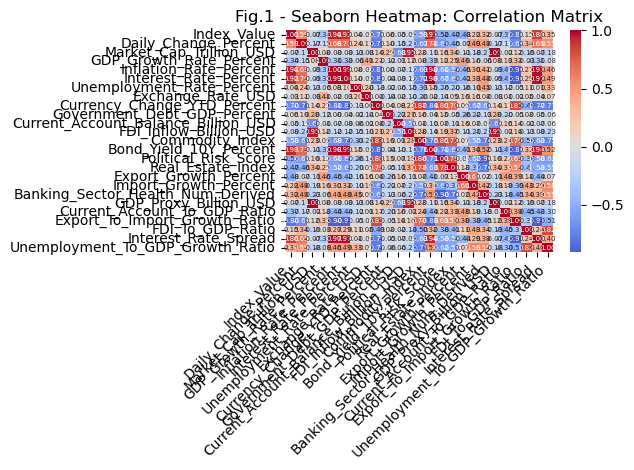

In [6]:
sns.heatmap(corr_df, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0, 
            annot_kws={"size": 5})
plt.xticks(rotation=45, 
           ha='right')
plt.yticks(rotation=0)
plt.title("Fig.1 - Seaborn Heatmap: Correlation Matrix", fontsize=12)
plt.tight_layout()
plt.show()

### What the Fig1 heatmap shows:
Probably too much detail here and we can't see where the stronger correlation is looking at this version. Will try another way to convey the info.

### Changing the dataframe - as we are only interested in features that correlate to other features over 90%  

In [7]:
"""
1. taking out the negative correlations & making them ALL positive - for sake of analysis
2. using a mask to make a new list from above table and selecting features just once without their duplicates
   (avoiding duplicate pairs - like we did for the pairplot graphs below)
3. all duplicate values set to 'NaN'; 
4. stacks remaining values into long format; index reset
5. the remaining values' columns are renamed
6. Apply threshold and remove duplicates/self-pairs, creating a new results dataframe called 'high_corr'
(Note: AI was used in parts to assist in editing/modifying the code to its final form below)
"""
corr_abs = corr_df.abs() #1.
mask = np.triu(np.ones_like(corr_abs, dtype=bool)) #2. & 3.
filtered_corr = corr_abs.mask(mask).stack().reset_index() #4.
filtered_corr.columns = ['Feature_List1', 'Feature_List2', 'Correlation'] #5.
high_corr = ( #6.
    filtered_corr[filtered_corr['Correlation'] > 0.9]
    .query('Feature_List1 != Feature_List2').reset_index(drop=True)
)

In [8]:
high_corr.head(10) #checking if the above code works

Feature_List1            Feature_List2  Correlation
0         Inflation_Rate_Percent              Index_Value     0.943576
1          Interest_Rate_Percent              Index_Value     0.921451
2          Interest_Rate_Percent   Inflation_Rate_Percent     0.993227
3         FDI_Inflow_Billion_USD  Market_Cap_Trillion_USD     0.950314
4         Bond_Yield_10Y_Percent              Index_Value     0.932529
5         Bond_Yield_10Y_Percent   Inflation_Rate_Percent     0.983856
6         Bond_Yield_10Y_Percent    Interest_Rate_Percent     0.992539
7          GDP_Proxy_Billion_USD  Market_Cap_Trillion_USD     1.000000
8          GDP_Proxy_Billion_USD   FDI_Inflow_Billion_USD     0.950314
9  Export_To_Import_Growth_Ratio   Inflation_Rate_Percent     0.902090

### Now that we know the high-correlating features - we go back to select again the features we are interested in

In [9]:
corr_df2 = df1.loc[:, [
    "Inflation_Rate_Percent", 
    "Index_Value", 
    "Interest_Rate_Percent", 
    "FDI_Inflow_Billion_USD",
    "GDP_Proxy_Billion_USD", 
    "Bond_Yield_10Y_Percent", 
    "Export_To_Import_Growth_Ratio"
]]

### Using the above - from this dataframe we can create a much 'cleaner' Seaborn Heatmap
 - Note the negative correlation features have been added back
 - Also all the features with correlations below 90% have been discarded 

In [10]:
sns.heatmap(corr_df2.corr(method='pearson'), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0, 
            annot_kws={"size": 8})
plt.xticks(rotation=45, 
           ha='right')
plt.yticks(rotation=0)
plt.title("Fig.2 - Seaborn Heatmap Retry: Correlation Matrix of 90% or above", fontsize=12)
plt.tight_layout()
plt.show()

### What Fig.2 above shows:
A much better drill-down into the higher correlation features. We can now work with this and plot some sample econ. factor pairings to investigate further.

### Checking just one high correlation pair above using a Seaborn Line Plot - Inflation Rate % vs Interest Rate %

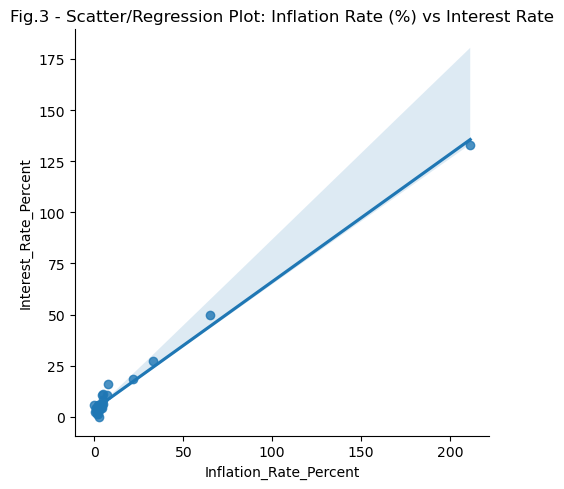

In [11]:
sns.lmplot(x="Inflation_Rate_Percent", 
           y="Interest_Rate_Percent", 
           data=corr_df2, 
           order=1)
plt.title("Fig.3 - Scatter/Regression Plot: Inflation Rate (%) vs Interest Rate", fontsize=12)
plt.tight_layout()
plt.show()

### What Fig.3 shows us:
As we are dealing with interest rates, the range of values is 'bunched' up around the zero percent - however there is clearly linear correlation between the two economic indicators. Few outliers present also for a small amount of countries where interest rate and inflation are 'out of control' (i.e values for both over the 25% mark).

### Now plotting for ALL correlation pairs from the above Seaborn Heatmap

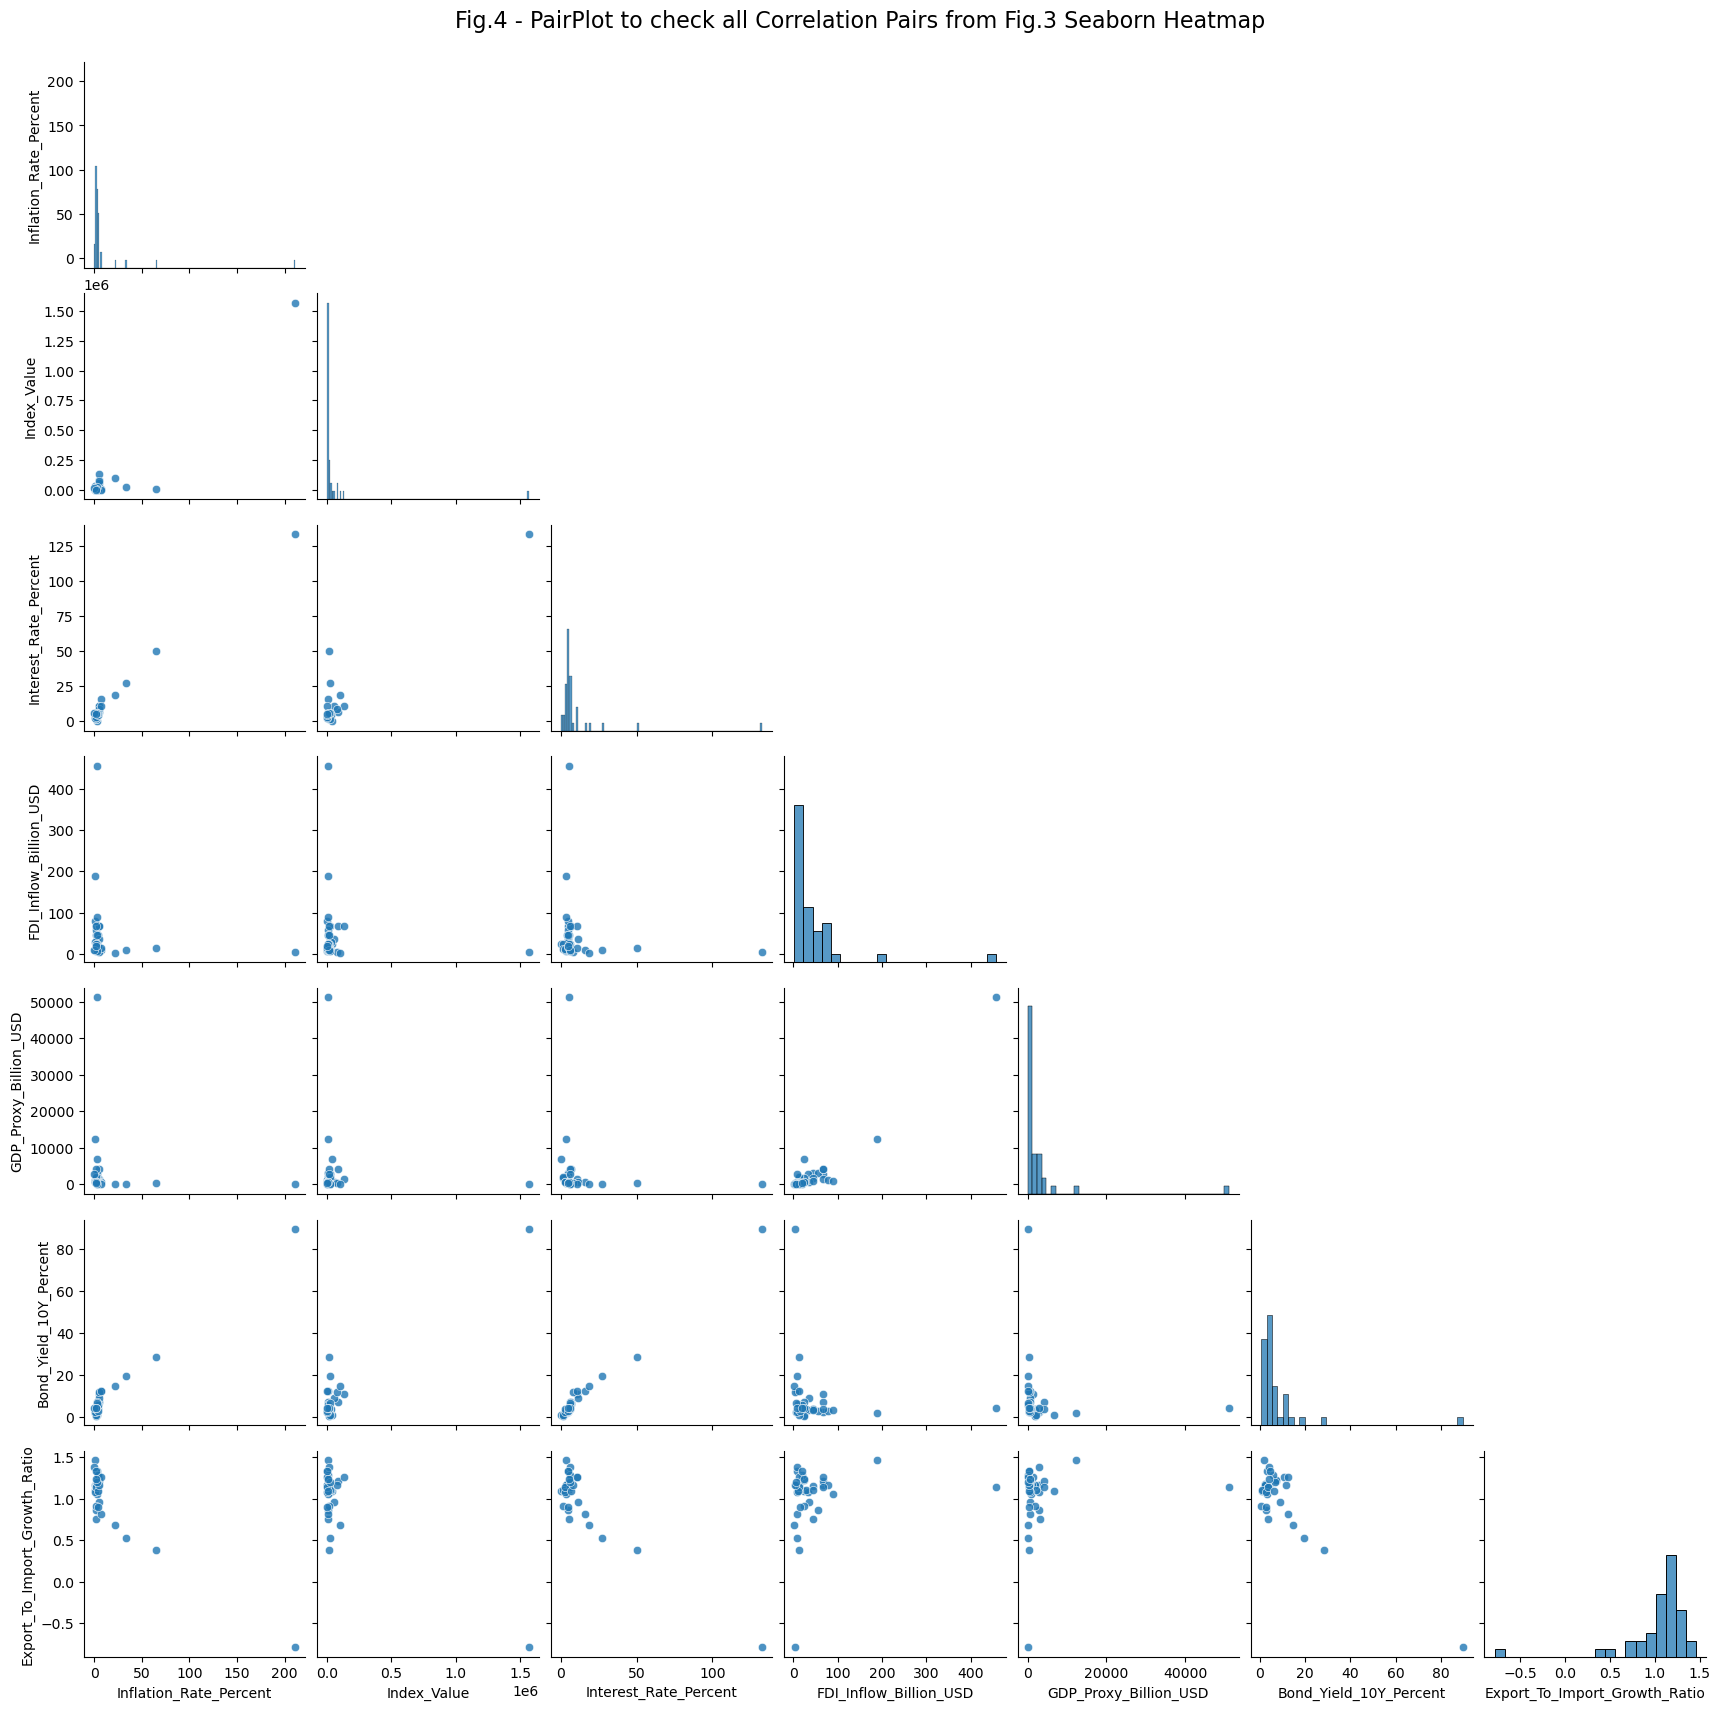

In [12]:
fig4 = sns.pairplot(data=corr_df2, plot_kws={'alpha':0.8});

for i, j in zip(*np.triu_indices_from(fig4.axes, 1)):  # the masking loop removes the upper triangle part
  fig4.axes[i, j].set_visible(False)

plt.suptitle("Fig.4 - PairPlot to check all Correlation Pairs from Fig.3 Seaborn Heatmap", fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust top to make room for the suptitle
plt.show()

### What Fig.4 shows us:
This is a useful way to review all the economic indicator pairs together to see, confirm and locate:
1. The positive correlations
2. The negative correlations
   
So that we can 'cherry-pick' the pairs of features we're interested in (as done below)

### Using a new dataframe to identify and collate just the features based on our research results

In [13]:
corr_df3 = df1.loc[:, [
    "Inflation_Rate_Percent", 
    "Index_Value", 
    "Interest_Rate_Percent", 
    "FDI_Inflow_Billion_USD",
    "GDP_Proxy_Billion_USD", 
    "Bond_Yield_10Y_Percent", 
    "Export_To_Import_Growth_Ratio", 
    "FDI_To_GDP_Ratio", 
    "GDP_Growth_Rate_Percent"
]]

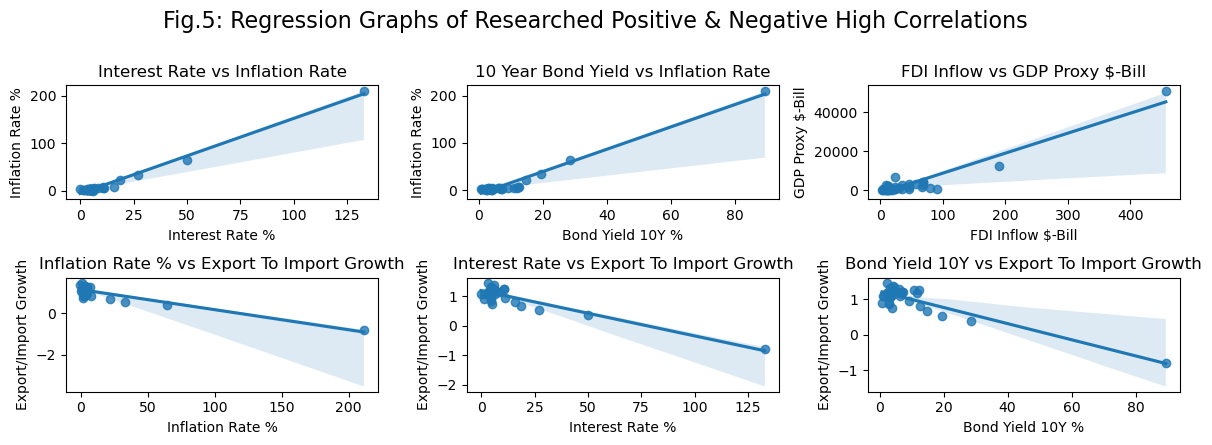

In [14]:
fig5, axes = plt.subplots(2, 3, figsize=(12, 4)) #sets the scene - uses Matplotlib to create 2x3 figures of certain size and axes
axes[0,0].set_title('Interest Rate vs Inflation Rate')
sns.regplot(data=corr_df3,
            x='Interest_Rate_Percent',
            y='Inflation_Rate_Percent',
            ax=axes[0,0],
            scatter=True)
axes[0,0].set_xlabel('Interest Rate %')
axes[0,0].set_ylabel('Inflation Rate %')

axes[0,1].set_title('10 Year Bond Yield vs Inflation Rate')
sns.regplot(data=corr_df3,
            x='Bond_Yield_10Y_Percent',
            y='Inflation_Rate_Percent',
            ax=axes[0,1],
            scatter=True)
axes[0,1].set_xlabel('Bond Yield 10Y %')
axes[0,1].set_ylabel('Inflation Rate %')

axes[0,2].set_title('FDI Inflow vs GDP Proxy $-Bill')
sns.regplot(data=corr_df3,
            x='FDI_Inflow_Billion_USD',
            y='GDP_Proxy_Billion_USD',
            ax=axes[0,2],
            scatter=True)
axes[0,2].set_xlabel('FDI Inflow $-Bill')
axes[0,2].set_ylabel('GDP Proxy $-Bill')

axes[1,0].set_title('Inflation Rate % vs Export To Import Growth')
sns.regplot(data=corr_df3,
            x='Inflation_Rate_Percent',
            y='Export_To_Import_Growth_Ratio',
            ax=axes[1,0],
            scatter=True)
axes[1,0].set_xlabel('Inflation Rate %')
axes[1,0].set_ylabel('Export/Import Growth')

axes[1,1].set_title('Interest Rate vs Export To Import Growth')
sns.regplot(data=corr_df3,
            x='Interest_Rate_Percent',
            y='Export_To_Import_Growth_Ratio',
            ax=axes[1,1],
            scatter=True)
axes[1,1].set_xlabel('Interest Rate %')
axes[1,1].set_ylabel('Export/Import Growth')

axes[1,2].set_title('Bond Yield 10Y vs Export To Import Growth')
sns.regplot(data=corr_df3,
            x='Bond_Yield_10Y_Percent',
            y='Export_To_Import_Growth_Ratio',
            ax=axes[1,2],
            scatter=True)
axes[1,2].set_xlabel('Bond Yield 10Y %')
axes[1,2].set_ylabel('Export/Import Growth')

plt.tight_layout()
fig5.suptitle('Fig.5: Regression Graphs of Researched Positive & Negative High Correlations', fontsize=16, y=1.1)
plt.show()

### What Fig.5 shows us:
Our researched results as documented in Table 1 (at the top of this notebook) is correct. From this, we can then determine the impact on the pricing of Global Index ETFs, with a view to going forward with price prediction using Machine Learning if need be (this is just showcasing the underlying principle/proof of concept). Would really help if we were also provided with ETF prices as a result so we see how accurate our data is for predicting the price based on actual time-series daily movement of the above economic indicators. But you feel that's for another time.

### Compare to similar review of correlations (with 90% restriction), but without any new features - we would get:

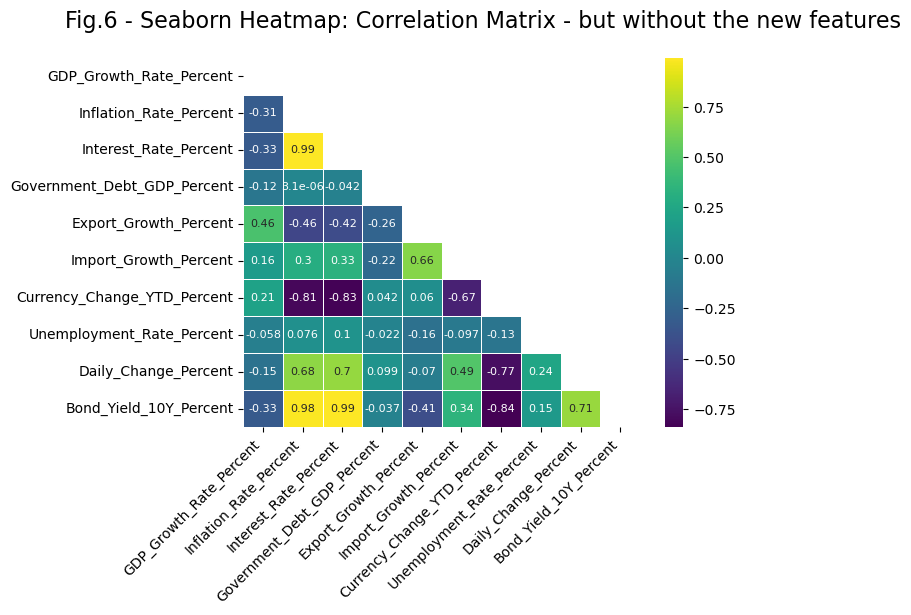

In [15]:
percent_df = df[
['Country','Country_Group_Derived','Currency_Code','GDP_Growth_Rate_Percent',
 'Inflation_Rate_Percent','Interest_Rate_Percent','Government_Debt_GDP_Percent',
 'Export_Growth_Percent','Import_Growth_Percent','Currency_Change_YTD_Percent',
 'Unemployment_Rate_Percent','Daily_Change_Percent','Bond_Yield_10Y_Percent']
]
percent_corr_df = percent_df.select_dtypes(include="number").corr(method='pearson')
mask = np.zeros_like(percent_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(percent_corr_df,
            annot=True,
            mask=mask,
            cmap='viridis',
            annot_kws={"size": 8},
            linewidths=0.5)
plt.ylim(percent_corr_df.shape[1],0);
plt.xticks(rotation=45, 
           ha='right')
plt.suptitle("Fig.6 - Seaborn Heatmap: Correlation Matrix - but without the new features", fontsize=16)
plt.show()

### What Fig.6 shows us:
If correlation was done with just the features provided it would have shown only 3 cases where the correlation was above the 90% threshold, showing us that the new features (e.g. added ratios) provided for a deeper analysis of the key economic indicators.

### More plots below to observe and identify key relationships between the features

In [16]:
fig7 = px.scatter(corr_df3, x='GDP_Growth_Rate_Percent', 
                  y='FDI_To_GDP_Ratio', 
                  color="Export_To_Import_Growth_Ratio", 
                  title="Fig.7: FDI/GDP vs GDP Growth Rate (%): Identify Investment Efficiency")
fig7.show()

### What Fig.7 shows us:
You can also use the dataframe to show how foreign investment into the contry (FDI) supports GDP growth and see how the country's export-to-import growth rate plays a part. The above shows that the stronger the export-to-import growth (meaning the country's trade is healthy) leads to strong GDP growth even where the foreign investment is still quite small relative to the country's Gross Domestic Product. This can be used to price indexed ETFs as the pricing is sensitvely linked to how the country is performing and the overall health of it's trade balance (export less import). 

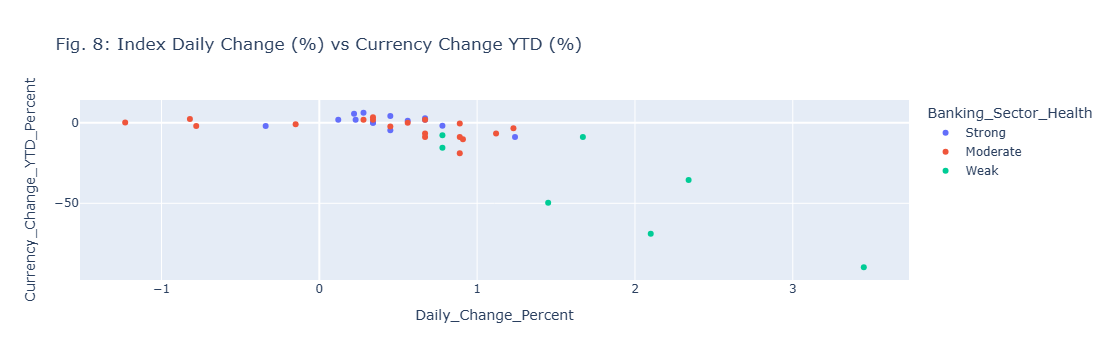

In [17]:
df4 = df1.loc[:, [
    "Daily_Change_Percent", 
    "Currency_Change_YTD_Percent", 
    "Banking_Sector_Health"
]]
df4.reset_index()

fig4 = px.scatter(df4, x='Daily_Change_Percent',
                  y='Currency_Change_YTD_Percent',
                  color = 'Banking_Sector_Health',
                  title="Fig. 8: Index Daily Change (%) vs Currency Change YTD (%)")
fig4.show()

### What Fig.8 shows us:
This has already been discussed as part of the 'Exploring the Data - A view into the Global Stock Markets' section. 

### Box chart - Comparing Commodity & Stock Index values across countries/country groups

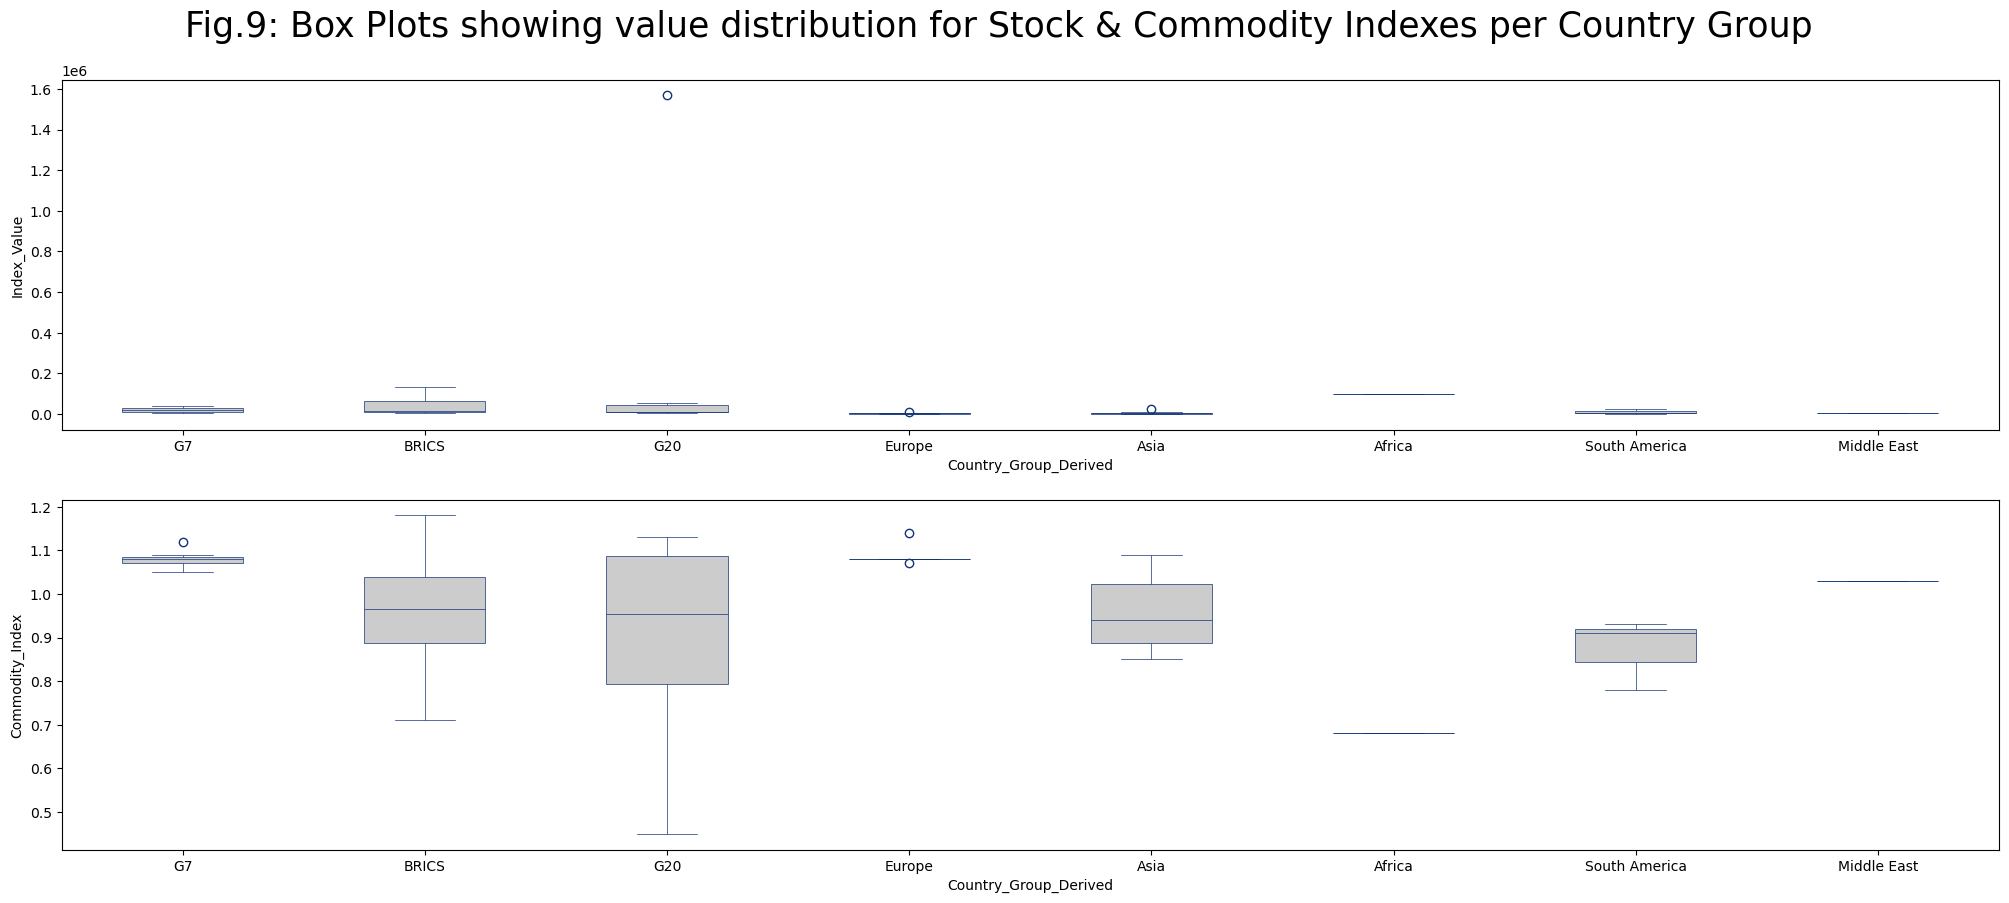

In [18]:
fig9, axes = plt.subplots(nrows=2, ncols=1, figsize =(25,10))

sns.boxplot(data=df, x="Country_Group_Derived", 
            y="Index_Value",
            ax=axes[0],
            color=".8", 
            linecolor="#137", 
            width=.5, 
            linewidth=.5)

sns.boxplot(data=df, x="Country_Group_Derived", 
            y="Commodity_Index",
            ax=axes[1],
            color=".8", 
            linecolor="#137", 
            width=.5, 
            linewidth=.5)

fig9.suptitle('Fig.9: Box Plots showing value distribution for Stock & Commodity Indexes per Country Group', fontsize=25, y=0.95)

plt.show()

### What Fig.9 shows us: Comparision of the value ranges for each stock market index versus the commodity index.
My research notes suggests: Strongly positive correlation tends to negatively impact the price of stock-based and bond-based Global Index ETFs but may positively impact commodity-based ETFs.The potential here is to use the Commodity Index as a 'hedge' against the decreasing Stock Index prices when faced with strong positive correlation of economic indicators. From the above, you notice that the boxplots are generally bigger showing more range for index movement - so it might be the case where the smaller decrease in stock market index value is met by a higher increase in the commodity index value so as to cancel out the negative impact on the index ETFs price. This is only if my research note findings hold true.

### Appendix: Additional Graphs (Unused for this Analysis - but may become relevant later on)  

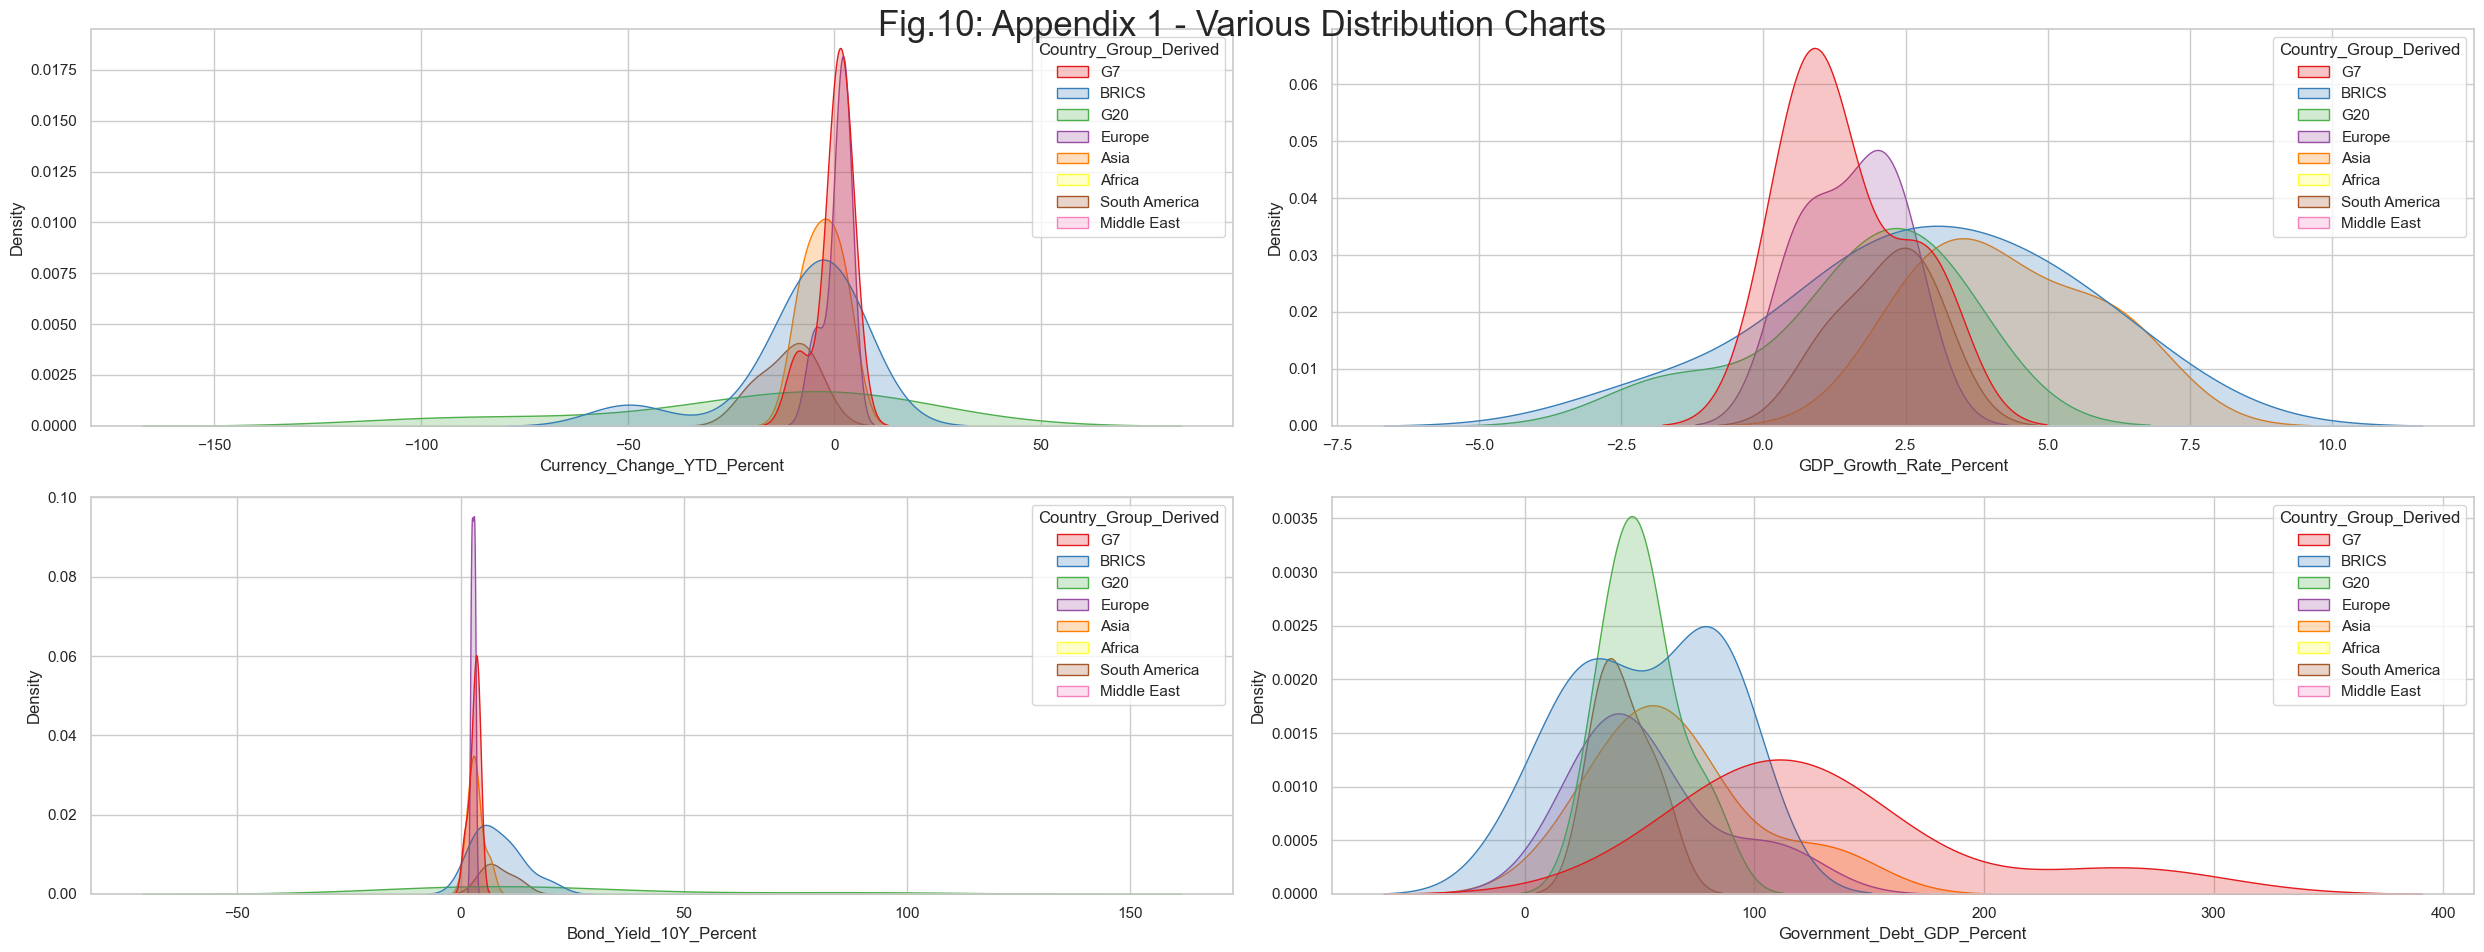

In [24]:
fig10, axes = plt.subplots(nrows=2, ncols=2, figsize =(25,10))
sns.kdeplot(data=percent_df, 
            x='Currency_Change_YTD_Percent',
            hue='Country_Group_Derived',
            ax=axes[0,0],
            fill=True,  
            palette='Set1')
sns.kdeplot(data=percent_df, 
            x='GDP_Growth_Rate_Percent',
            hue='Country_Group_Derived',
            ax=axes[0,1],fill=True,  
            palette='Set1')
sns.kdeplot(data=percent_df, 
            x='Bond_Yield_10Y_Percent',
            hue='Country_Group_Derived',
            ax=axes[1,0],fill=True,  
            palette='Set1')
sns.kdeplot(data=percent_df, 
            x='Government_Debt_GDP_Percent',
            hue='Country_Group_Derived',
            ax=axes[1,1],fill=True, 
            palette='Set1')
fig10.suptitle('Fig.10: Appendix 1 - Various Distribution Charts', fontsize=25, y=0.95)
plt.tight_layout()
plt.show()

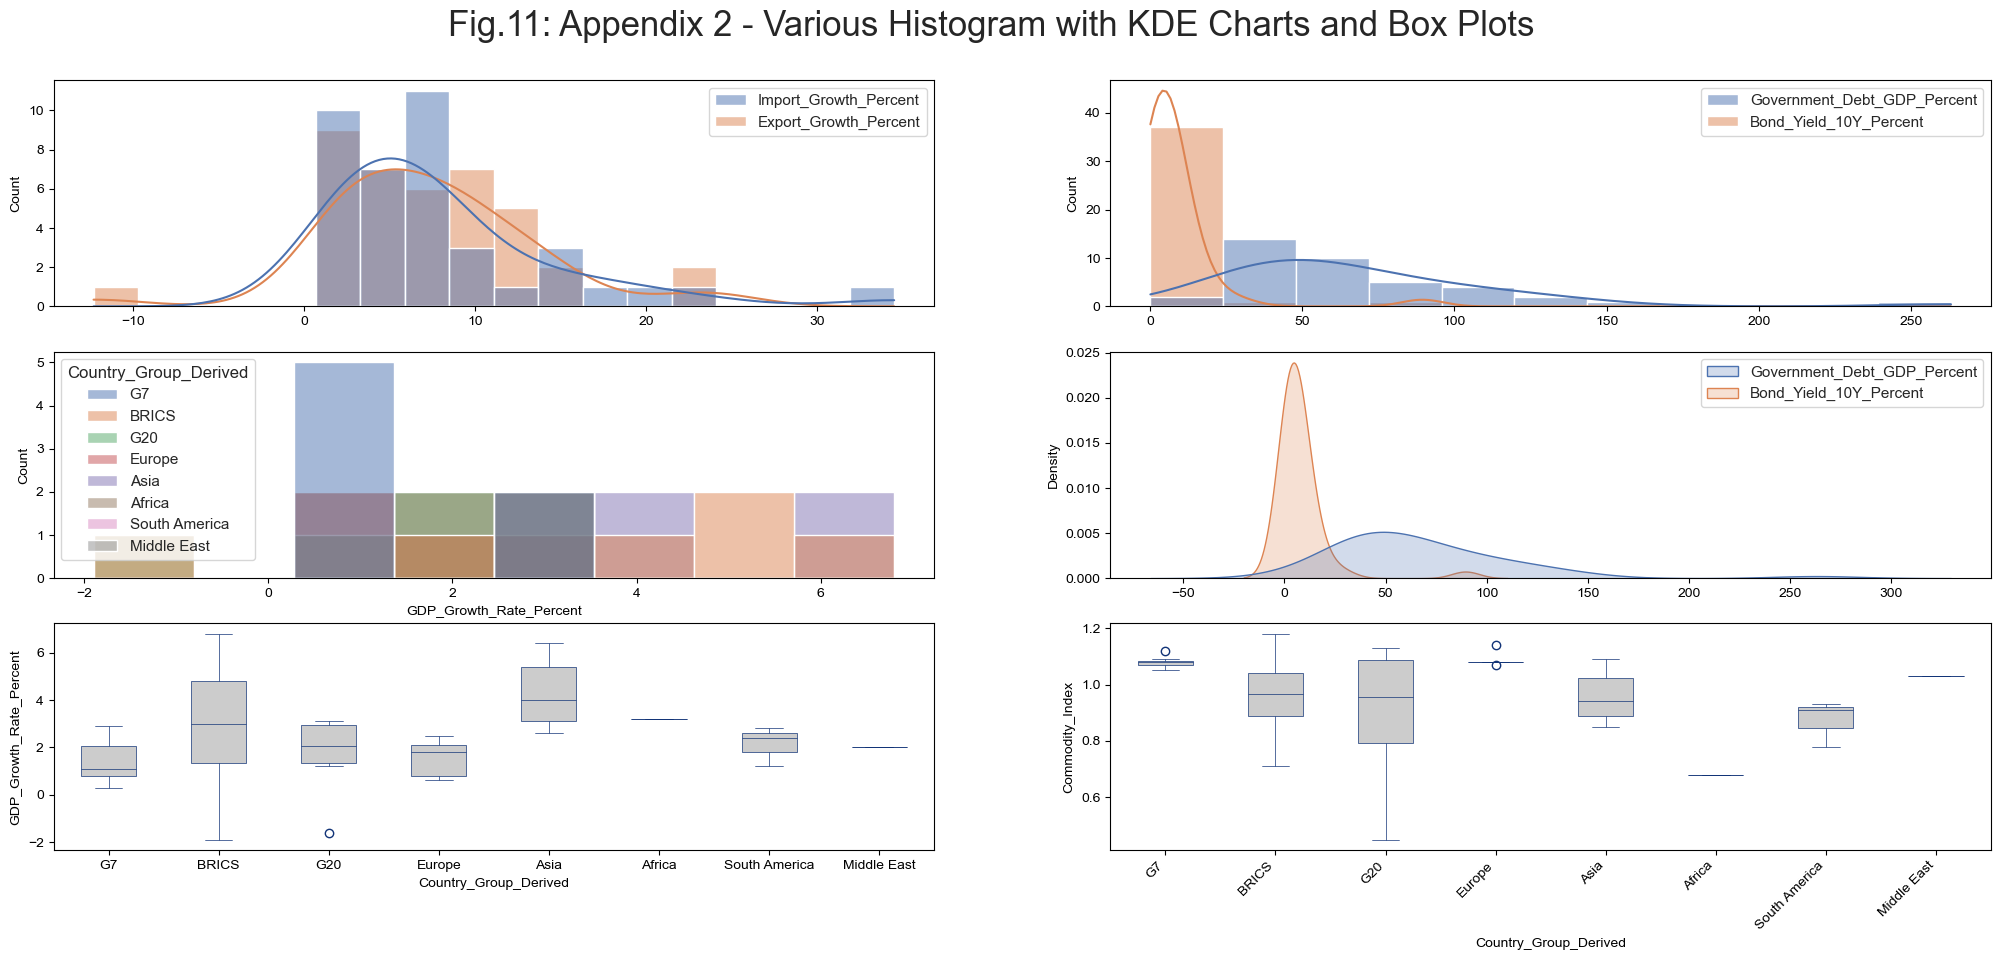

In [20]:
fig11, axes = plt.subplots(nrows=3, ncols=2, figsize =(25,10))

sns.set_theme(style="whitegrid")
sns.histplot(data=percent_df[['Import_Growth_Percent',
                              'Export_Growth_Percent']],
             kde = True,
             ax=axes[0,0])

sns.set_theme(style="whitegrid")
sns.histplot(data=percent_df[['Government_Debt_GDP_Percent',
                              'Bond_Yield_10Y_Percent']],
             kde = True,
             ax=axes[0,1])

sns.histplot(data=percent_df, 
             x="GDP_Growth_Rate_Percent",
            hue ='Country_Group_Derived',
            ax=axes[1,0])

sns.boxplot(data=percent_df, 
            x="Country_Group_Derived", 
            y="GDP_Growth_Rate_Percent",
            color=".8", 
            linecolor="#137", 
            width=.5, 
            linewidth=.5,
            ax=axes[2,0])
plt.xticks(rotation=45, 
           ha='right')

sns.kdeplot(data=percent_df.filter(['Government_Debt_GDP_Percent',
                                    'Bond_Yield_10Y_Percent'], 
                                   axis=1),
            fill=True,
            ax=axes[1,1])

sns.boxplot(data=df, x="Country_Group_Derived", 
            y="Commodity_Index",
            color=".8", 
            linecolor="#137", 
            width=.5, 
            linewidth=.5,
            ax=axes[2,1])
plt.xticks(rotation=45, 
           ha='right')
fig11.suptitle('Fig.11: Appendix 2 - Various Histogram with KDE Charts and Box Plots', fontsize=25, y=0.95)
plt.show()

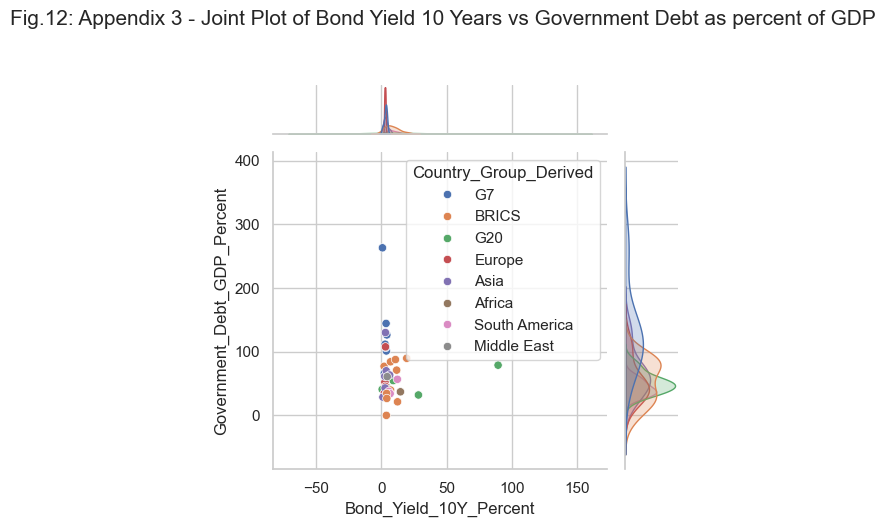

In [21]:
# Note this chart was successfully finalised using AI assistance
jp = sns.jointplot(data=percent_df, 
                  y='Government_Debt_GDP_Percent', 
                  x='Bond_Yield_10Y_Percent',
                  hue="Country_Group_Derived",
                  height=5,
                  ratio=5) 

jp.fig.suptitle('Fig.12: Appendix 3 - Joint Plot of Bond Yield 10 Years vs Government Debt as percent of GDP ', fontsize=15, y=1.05)
jp.fig.tight_layout()
jp.fig.subplots_adjust(top=0.9)

plt.show()